In [1]:
from sklearn.preprocessing import OneHotEncoder
import csv
import numpy as np
import pandas as pd

# Read data for X and y
X = pd.read_csv("data\X.csv").values
y = pd.read_csv("data\y.csv").values

# Flatten list y
y = [item for sublist in y for item in sublist]

In [2]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
#sm = SMOTE(random_state=42)
#X_res, y_res = sm.fit_resample(X, y)

oversampler = RandomOverSampler(random_state=42)
X_res, y_res = oversampler.fit_resample(X,y)

In [3]:
# One-hot-encoding for sequences in X
import numpy as np

list_of_sequences = X_res

# Create a set of unique IDs
unique_ids = set()
for sequence in list_of_sequences:
    unique_ids.update(sequence)

# Convert the set to a sorted list
sorted_unique_ids = sorted(unique_ids)

# Create a dictionary mapping each ID to its index
id_to_index = {id: index for index, id in enumerate(sorted_unique_ids)}

# One-hot encode each sequence separately
encoded_sequences = []
for sequence in list_of_sequences:
    encoded_sequence = np.zeros((len(sequence), len(sorted_unique_ids)), dtype=int)
    for i, id in enumerate(sequence):
        index = id_to_index[id]
        encoded_sequence[i, index] = 1
    encoded_sequences.append(encoded_sequence)

X_res = encoded_sequences

In [4]:
# Flatten nested list in order to pass it to the model

flattened_X = np.array([np.array(row).flatten() for row in X_res])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(flattened_X, y_res, random_state = 42, test_size = 0.33)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
import joblib

# Define the scoring metric
scorer = make_scorer(f1_score)

model = KNeighborsClassifier()

grid_space={'n_neighbors':[5,7,9,11,13,15],
            'weights':['uniform','distance'],
            'metric':['minkowski','euclidean','manhattan']
            }

grid = GridSearchCV(model,param_grid=grid_space,cv=3,scoring="f1_micro",verbose=10, n_jobs=4)

# Enable verbose logging using joblib
joblib.parallel_backend('threading')

model_grid = grid.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 1/36] START metric=minkowski, n_neighbors=5, weights=uniform...........
[CV 2/3; 1/36] START metric=minkowski, n_neighbors=5, weights=uniform...........
[CV 3/3; 1/36] START metric=minkowski, n_neighbors=5, weights=uniform...........
[CV 1/3; 2/36] START metric=minkowski, n_neighbors=5, weights=distance..........
[CV 1/3; 2/36] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.760 total time=  47.8s
[CV 2/3; 2/36] START metric=minkowski, n_neighbors=5, weights=distance..........
[CV 1/3; 1/36] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.721 total time= 1.1min
[CV 3/3; 2/36] START metric=minkowski, n_neighbors=5, weights=distance..........
[CV 2/3; 1/36] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.707 total time= 1.5min
[CV 1/3; 3/36] START metric=minkowski, n_neighbors=7, weights=uniform...........
[CV 3/3; 1/36] END metric=minkowski, n_neighbors=5, weights=uniform

In [7]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best score is: 0.7633577499077399


In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [60]:
y_pred = knn.predict(X_test)

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.79      0.67      0.72       474
          15       0.89      0.84      0.86       450
          16       0.91      0.94      0.92       442
          21       0.73      0.91      0.81       449
          33       0.48      0.45      0.46       452
          34       0.97      1.00      0.99       421
          39       0.81      0.97      0.88       421
          56       0.57      0.65      0.61       429
          68       0.55      0.43      0.49       422
          95       0.65      0.94      0.77       407
        1000       0.87      0.64      0.74       401
        1001       0.48      0.33      0.39       432

    accuracy                           0.73      5200
   macro avg       0.73      0.73      0.72      5200
weighted avg       0.72      0.73      0.72      5200



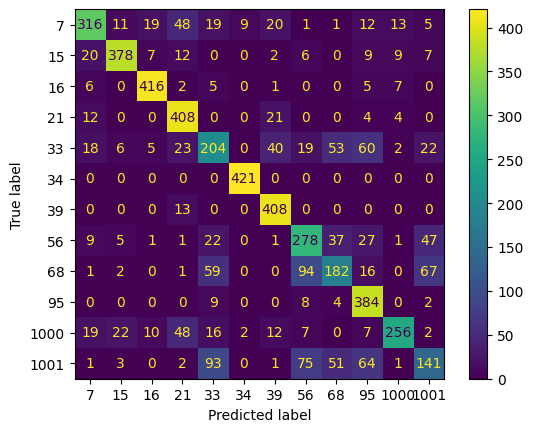

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()